# Assignment 03 - Diego Plata 101354581

Dear Team,

I hope you are doing GREAT!

The following assignment is divided in two parts:
- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.

The assignment is easy to follow yet needs the patience to solve each question at a time.

**Note:**

Please note that every question has 0.5 and it provides five out of total ten marks for the assignment.

The video presentation, as you have done for previous assignments, provides the rest of the mark, which is 5.

In short, 5 for coding + 5 for the video presentation = 10, but without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [5]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [6]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [7]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [8]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




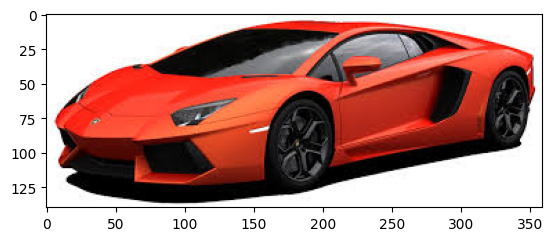

In [9]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [10]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


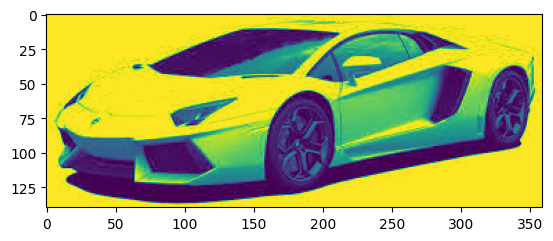

In [11]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
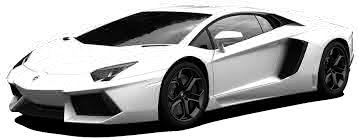

In [12]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [13]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [14]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [15]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

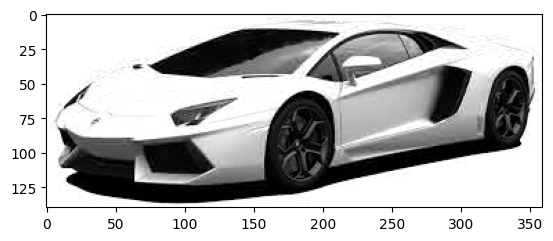

In [16]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [17]:
# Define a function to squash out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [18]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

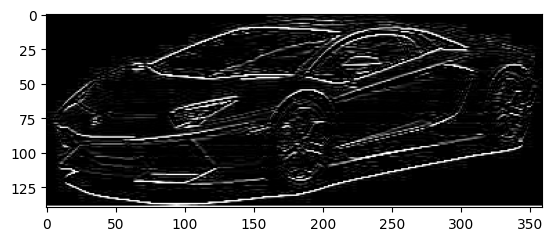

In [19]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

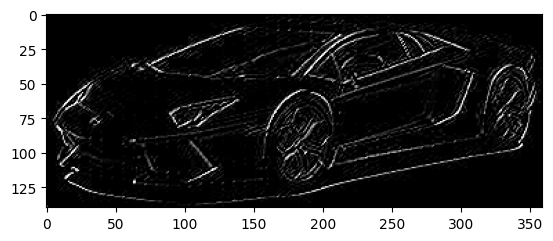

In [20]:
# Type your code here
acute_kernel = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])
transf_acute = conv_2d_kernel(input_img_arr, kernel=acute_kernel)
plt.imshow(transf_acute, cmap=plt.get_cmap("gray"))

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

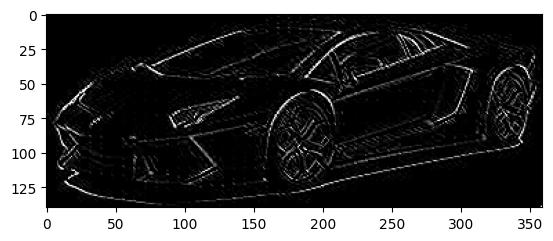

In [21]:
# Type your code here
obtuse_kernel = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
transf_obtuse = conv_2d_kernel(input_img_arr, kernel=obtuse_kernel)
plt.imshow(transf_obtuse, cmap=plt.get_cmap("gray"))

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [22]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

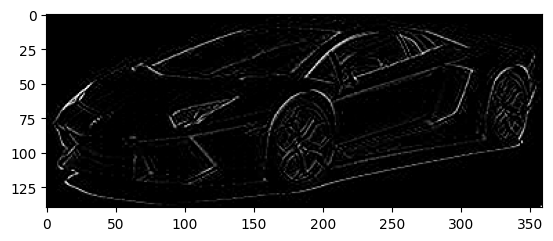

In [23]:
# Type your code here
transf_edge = conv_2d_kernel(input_img_arr, kernel=edge_kernel_1)
plt.imshow(transf_edge, cmap=plt.get_cmap("gray"))

#### 02-b:

In [24]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

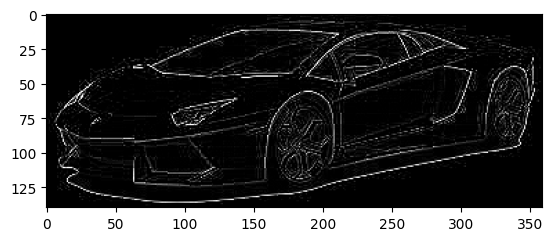

In [25]:
# Type your code here
transf_edge_2 = conv_2d_kernel(input_img_arr, kernel=edge_kernel_2)
plt.imshow(transf_edge_2, cmap=plt.get_cmap("gray"))

#### 02-c:

In [26]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

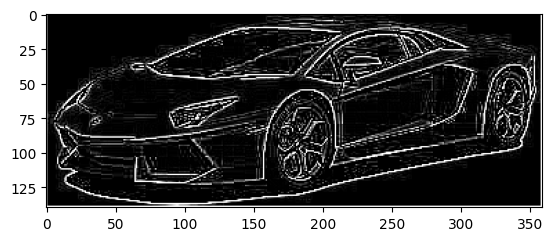

In [27]:
# Type your code here
transf_edge_3 = conv_2d_kernel(input_img_arr, kernel=edge_kernel_3)
plt.imshow(transf_edge_3, cmap=plt.get_cmap("gray"))

# PART B

## Importing Libraries

In [28]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [29]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [30]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [31]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [32]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1050890 (4.01 MB)
Trainable params: 1050890 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## CustomCallback class for logging

In [34]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [35]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [36]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.43794000148773193
Accuracy reached val is 0.5011000037193298

 Finished epoch # 5
Accuracy resched train is 0.6623200178146362
Accuracy reached val is 0.6353999972343445

 Finished epoch # 10
Accuracy resched train is 0.7271599769592285
Accuracy reached val is 0.6528000235557556

 Finished epoch # 15
Accuracy resched train is 0.7746999859809875
Accuracy reached val is 0.6581000089645386

 Finished epoch # 20
Accuracy resched train is 0.8189600110054016
Accuracy reached val is 0.6589999794960022

 Finished epoch # 25
Accuracy resched train is 0.8583800196647644
Accuracy reached val is 0.651199996471405

 Finished epoch # 30
Accuracy resched train is 0.8905199766159058
Accuracy reached val is 0.6496000289916992

 Finished epoch # 35
Accuracy resched train is 0.9196400046348572
Accuracy reached val is 0.6473000049591064

 Finished epoch # 40
Accuracy resched train is 0.9467399716377258
Accuracy reached val is 0.6444000005722046

 Finished ep

## Plotting the Results

In [37]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

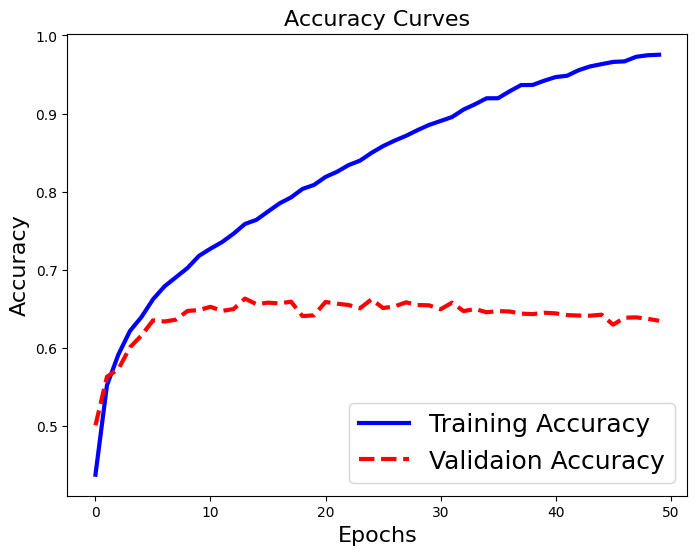

In [38]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?

Answer: Yes, the network started overfitting around the 10th epoch

#### 04: Write down how many layers this model has and identify their types

Answer: Five layers. Conv2d, MaxPooling2d, Flatten Layer, Dense Layer, Dense

#### 05: Briefly explain what is the purpose of each of those layers

Answer: The first one creates a convolution kernel that helps to produce a tensor of outputs. The second one reduces the spatial dimensions of the output. The third one takes the array of the data and converts it into a single dimension. And the last two feed data from previous layer to provide an output based on previous weights and outputs.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [39]:
# Type your code here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(128, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [40]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4258599877357483
Accuracy reached val is 0.5091999769210815

 Finished epoch # 5
Accuracy resched train is 0.7105200290679932
Accuracy reached val is 0.6819000244140625

 Finished epoch # 10
Accuracy resched train is 0.790440022945404
Accuracy reached val is 0.7074999809265137

 Finished epoch # 15
Accuracy resched train is 0.85944002866745
Accuracy reached val is 0.7139999866485596

 Finished epoch # 20
Accuracy resched train is 0.9167199730873108
Accuracy reached val is 0.7124999761581421

 Finished epoch # 25
Accuracy resched train is 0.9620400071144104
Accuracy reached val is 0.704800009727478

 Finished epoch # 30
Accuracy resched train is 0.9845399856567383
Accuracy reached val is 0.70660001039505

 Finished epoch # 35
Accuracy resched train is 0.9789599776268005
Accuracy reached val is 0.6949999928474426

 Finished epoch # 40
Accuracy resched train is 0.96670001745224
Accuracy reached val is 0.6929000020027161

 Finished epoch # 45

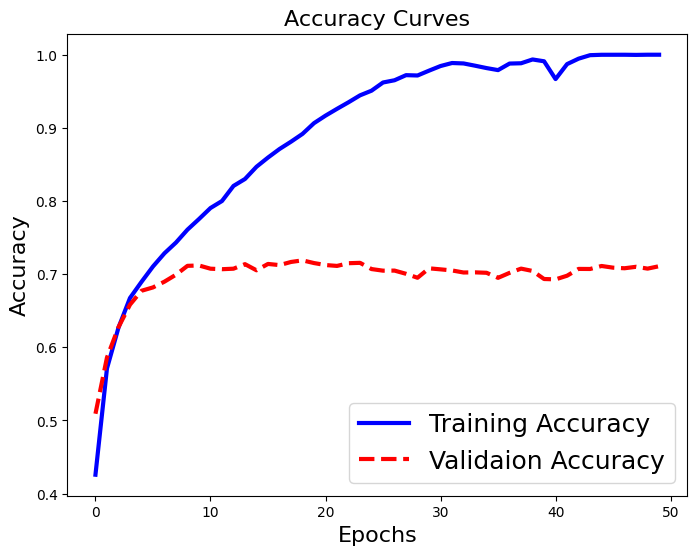

In [41]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

Answer: The models have similar results but the modified one has a higher validation accuracy compared to the previous model.

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [42]:
# Type your code here
from keras.backend import dropout
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(128, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Dropout(0.5),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [43]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4247399866580963
Accuracy reached val is 0.5351999998092651

 Finished epoch # 5
Accuracy resched train is 0.6871200203895569
Accuracy reached val is 0.6973000168800354

 Finished epoch # 10
Accuracy resched train is 0.7481600046157837
Accuracy reached val is 0.7275000214576721

 Finished epoch # 15
Accuracy resched train is 0.789080023765564
Accuracy reached val is 0.7412999868392944

 Finished epoch # 20
Accuracy resched train is 0.8230000138282776
Accuracy reached val is 0.7332000136375427

 Finished epoch # 25
Accuracy resched train is 0.8517799973487854
Accuracy reached val is 0.7627000212669373

 Finished epoch # 30
Accuracy resched train is 0.8766000270843506
Accuracy reached val is 0.7555999755859375

 Finished epoch # 35
Accuracy resched train is 0.8995000123977661
Accuracy reached val is 0.7649000287055969

 Finished epoch # 40
Accuracy resched train is 0.9110599756240845
Accuracy reached val is 0.7590000033378601

 Finished epo

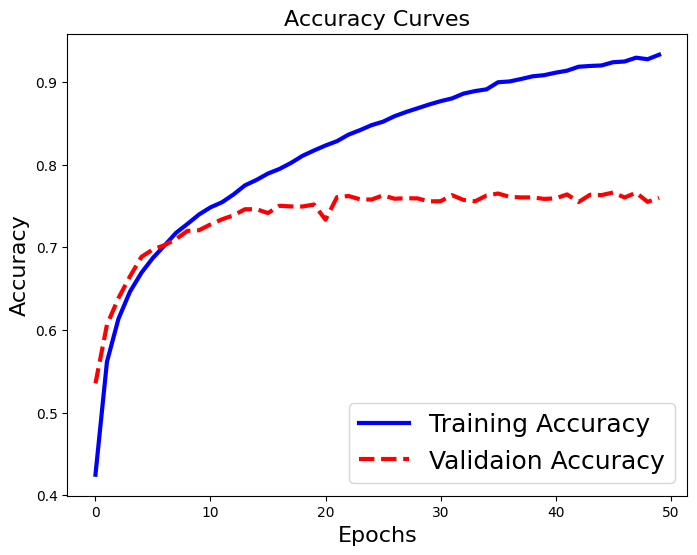

In [44]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

Answer: A drooput layer is used to reduce the overfitting of neural networks. It works by removing the unwanted data.

#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [45]:
# Type your answer here
from keras.backend import dropout
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Dropout(0.8),
          keras.layers.Flatten(),
          keras.layers.Dense(512, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [46]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.39932000637054443
Accuracy reached val is 0.5378000140190125

 Finished epoch # 5
Accuracy resched train is 0.618939995765686
Accuracy reached val is 0.6740000247955322

 Finished epoch # 10
Accuracy resched train is 0.6825000047683716
Accuracy reached val is 0.7240999937057495

 Finished epoch # 15
Accuracy resched train is 0.7263799905776978
Accuracy reached val is 0.748199999332428

 Finished epoch # 20
Accuracy resched train is 0.7577999830245972
Accuracy reached val is 0.7544000148773193

 Finished epoch # 25
Accuracy resched train is 0.7801200151443481
Accuracy reached val is 0.7541999816894531

 Finished epoch # 30
Accuracy resched train is 0.7968800067901611
Accuracy reached val is 0.76910001039505

 Finished epoch # 35
Accuracy resched train is 0.8088200092315674
Accuracy reached val is 0.7753999829292297

 Finished epoch # 40
Accuracy resched train is 0.8273199796676636
Accuracy reached val is 0.7731999754905701

 Finished epoch

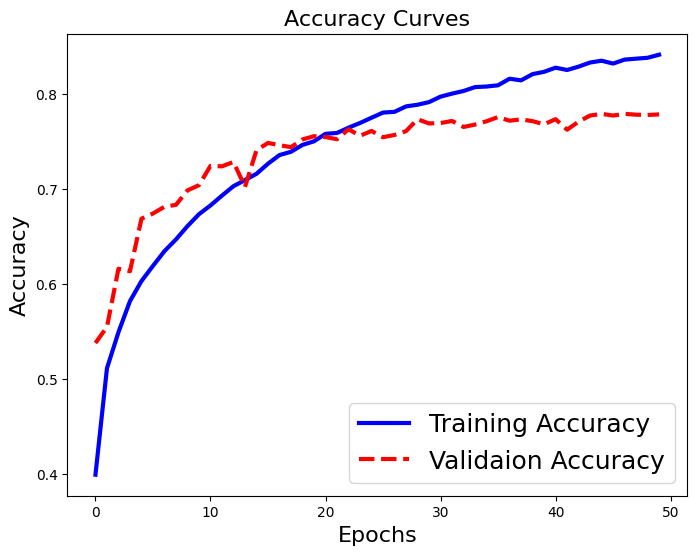

In [47]:
# Call the result_plotting() to display the results from your code
result_plotting()

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a COMENTS SUBMISSION SECTION on your D2L SUBMISSION. Omitting this comment will result in a 0% for your total mark.

- To get the 5% of the (coding) mark, you need to submit a YouTube video that scrolls through your code, explaining every single line of your code.

Then submit the link to the uploaded YouTube video in the **Comments Submision section**.  


**Summary:**

In short, what we need to submit are:

a)	The current **ipynb file** that contains all the code (5 marks).

b)	The **YouTube link** of your recorded video in the **Comments Submission section** (5 marks).

Zero for submissions, without YouTube video explanation.


All my best,

Reza


In [48]:
# Diego Plata - 101354581